<a href="https://colab.research.google.com/github/H-b-IO-T-O-H/ML_lr1/blob/main/lr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pylab as plt 
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split


data = pd.read_csv('drive/MyDrive/Colab Notebooks/winequality-red.csv', sep = ',')
#data.info()
data.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


создадим стобец качетва, который для quality>=5 ставит оценку 1, в остальных случаях - 0

In [ ]:
res = data['quality'].values
data['quality_binary'] = np.where(data['quality']>=6, 1, 0)
len(data[(data['quality_binary']==1)])

855

In [ ]:
from sklearn.linear_model import LogisticRegression

X = [data['fixed acidity'], data['volatile acidity'], 
     data['citric acid'], 
     data['residual sugar'], data['chlorides'],data['free sulfur dioxide'],
     data['total sulfur dioxide'], data['density'], data['pH'],
     data['sulphates'],
     data['alcohol']
     ]
y = data['quality_binary']
X = data.iloc[:, 0:2].values
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# print(X)

[[7.4   0.7  ]
 [7.8   0.88 ]
 [7.8   0.76 ]
 ...
 [6.3   0.51 ]
 [5.9   0.645]
 [6.    0.31 ]]


0.6525

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: No contour levels were found within the data range.


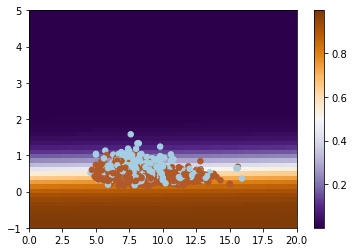

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
#classifier.fit(X, y)

# Построим график, который покажет, как обучилась логистическая регрессия.
def plot_boundary(clf, X, y):
    xx, yy = np.meshgrid(np.linspace(0, 20, 50),
                     np.linspace(-1, 5, 50))
    
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1].reshape(xx.shape)
    

    image = plt.imshow(Z, interpolation='nearest',
                           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                           aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.axis([0, 20, -1, 5])
    plt.colorbar(image)


plot_boundary(classifier, X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: No contour levels were found within the data range.


0.6497811131957474

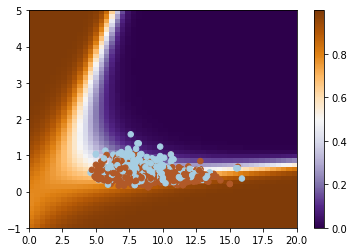

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
new_classifier = Pipeline([('poly', PolynomialFeatures(degree=2)), ('logit', LogisticRegression(max_iter=10000))])
new_classifier.fit(X, y)

# Обучим новый классификатор на тех же данных и посмотрим, как он себя ведет в исходном пространстве признаков.

plot_boundary(new_classifier, X, y)
new_classifier.score(X, y)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=6, shuffle=True, random_state=10) # создаем генератор разбиений
accuracy = []
C_list = [ 10**-4, 10**-3, 10**-2, 10**-1,  10**0,  10**1, 10**2]

for i in range(0, len(C_list)):
    clf = LogisticRegression(penalty='l1', C=C_list[i], random_state=10, solver='liblinear', max_iter=10000)
    current_score = cross_val_score(clf, X_train, y_train, cv=kfold).mean()
    accuracy.append(current_score)
    print('При С=', C_list[i], 'точность равна:', current_score)
    
max_score = 0
c_for_max_score = 0
for i in range(0, len(accuracy)):
    if max_score < accuracy[i]:
        max_score = accuracy[i]
        c_for_max_score = i
        
print('\n')
print('Максимальная точность равна:', max_score, 'она получена при С:',  C_list[c_for_max_score])

При С= 0.0001 точность равна: 0.4678475711892798
При С= 0.001 точность равна: 0.4678475711892798
При С= 0.01 точность равна: 0.5321524288107203
При С= 0.1 точность равна: 0.6038609715242881
При С= 1 точность равна: 0.6363525963149079
При С= 10 точность равна: 0.6371901172529313
При С= 100 точность равна: 0.6371901172529313


Максимальная точность равна: 0.6371901172529313 она получена при С: 10


In [ ]:
data1 = pd.read_csv ('drive/MyDrive/Colab Notebooks/winequality-red.csv', sep = ',')
#Текстовых столбцов нет, добавим binary признак
data1['quality_binary'] = np.where(data['quality']>=6, 1, 0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_binary        1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [ ]:
x=data1['alcohol']
y=data1['quality_binary']
data2 = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
data2['x_2'] = data1['fixed acidity']
data2['x_3'] = data1['volatile acidity']
data2['x_4'] = data1['residual sugar']
data2['x_5'] = data1['chlorides']
data2['x_6'] = data1['total sulfur dioxide']
data2['x_7'] = data1['density']

print(data2.astype(float, errors = 'ignore'))

         x    y   x_2    x_3  x_4    x_5   x_6      x_7
0      9.4  0.0   7.4  0.700  1.9  0.076  34.0  0.99780
1      9.8  0.0   7.8  0.880  2.6  0.098  67.0  0.99680
2      9.8  0.0   7.8  0.760  2.3  0.092  54.0  0.99700
3      9.8  1.0  11.2  0.280  1.9  0.075  60.0  0.99800
4      9.4  0.0   7.4  0.700  1.9  0.076  34.0  0.99780
...    ...  ...   ...    ...  ...    ...   ...      ...
1594  10.5  0.0   6.2  0.600  2.0  0.090  44.0  0.99490
1595  11.2  1.0   5.9  0.550  2.2  0.062  51.0  0.99512
1596  11.0  1.0   6.3  0.510  2.3  0.076  40.0  0.99574
1597  10.2  0.0   5.9  0.645  2.0  0.075  44.0  0.99547
1598  11.0  1.0   6.0  0.310  3.6  0.067  42.0  0.99549

[1599 rows x 8 columns]


Получили выборку с 7 признаками. Обучим регрессию. Создадим функцию, которая обучает регрессию, принимая на вход максимальную степень x (седьмую). L2-регуляризация

In [ ]:
#Рассмотрим линейный регрессор с L2-регуляризацией (реализована в классе Ridge)
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Модель обучения
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data2[predictors],data2['y'])
    y_pred = ridgereg.predict(data2[predictors])
    
    #Проверим, может ли быть нарисован график с выбранным альфа
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data2['x'],y_pred)
        plt.plot(data2['x'],data2['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Возвращаем результат в заранее опредленном формате
    rss = sum((y_pred-data2['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

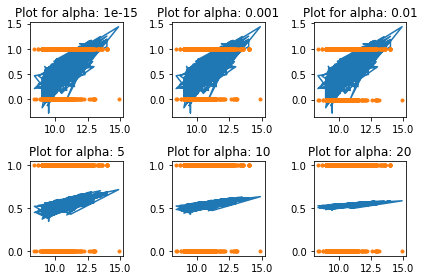

In [ ]:
#Обучаем
#Определим предикторы
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,8)])

#Выберем альфа-значения для рисования, коэффициенты альфа регулируют степень регуляризации
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Определяем датафрейм для хранения результатов
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,8)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

#models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
models_to_plot = {1e-15:231, 1e-3:232, 1e-2:233, 5:234, 10:235, 20:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data2, predictors, alpha_ridge[i], models_to_plot)
#Обучаем нашу модель на 10 степенях, 
#благодаря регуляризации у нас ненужные степени должны иметь малый вес, при этом нужные степени не должны иметь большой вес

In [ ]:
#Посмотрим на коэффициенты при различных альфа
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7
alpha_1e-15,291.703,-6.40065,0.173182,0.00906466,-0.634518,8.96006e-06,-0.15328,-0.0020584,5.51676
alpha_1e-10,291.703,-6.40065,0.173182,0.00906466,-0.634518,8.96007e-06,-0.15328,-0.0020584,5.51676
alpha_1e-08,291.703,-6.40064,0.173182,0.00906466,-0.634518,8.9609e-06,-0.15328,-0.0020584,5.51676
alpha_0.0001,291.703,-6.38051,0.17315,0.00907821,-0.634455,1.74032e-05,-0.153342,-0.00205834,5.49673
alpha_0.001,291.703,-6.20068,0.172862,0.00919911,-0.633888,9.27405e-05,-0.153898,-0.0020578,5.31784
alpha_0.01,291.714,-4.53113,0.170118,0.0103099,-0.628392,0.000786132,-0.159318,-0.00205213,3.6578
alpha_1,310.393,11.5416,0.0853205,0.0134243,-0.366755,0.00358966,-0.280701,-0.00134046,-11.7749
alpha_5,355.576,6.01361,0.0315547,0.00469142,-0.139123,0.000524053,-0.153922,-0.000532119,-5.75525
alpha_10,372.552,3.80651,0.017754,0.00253765,-0.0783136,0.000142535,-0.0931857,-0.000303018,-3.4259
alpha_20,383.844,2.34229,0.00947923,0.00131701,-0.041783,2.49238e-05,-0.0517893,-0.000162805,-1.8894


L1-регуляризация

In [ ]:
#Рассмотрим линейный регрессор с L1-регуляризацией (реализована в классе Lasso)
from sklearn.linear_model import Lasso
def lasso_regression(data2, predictors, alpha, models_to_plot={}):
    #Модель обучения
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data2[predictors],data2['y'])
    y_pred = lassoreg.predict(data2[predictors])
    
    #Выберем альфа-значения (лямбда по формулам в теории ) для рисования, коэффициенты альфа регулируют степень регуляризации
    #Проверим, может ли быть нарисован график с выбранным альфа (лямбда по формулам в теории )
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data2['x'],y_pred)
        plt.plot(data2['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Определяем датафрейм для хранения результатов
    rss = sum((y_pred-data2['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

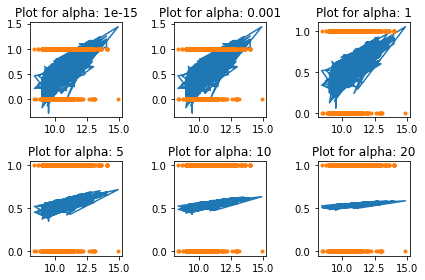

In [ ]:
#Обучаем
#Определим предикторы
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,8)])

#Выберем альфа-значения для рисования, коэффициенты альфа регулируют степень регуляризации
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Определяем датафрейм для хранения результатов
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,8)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

#models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
models_to_plot = {1e-15:231, 1e-3:232, 1:233, 5:234,10:235, 20:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data2, predictors, alpha_ridge[i], models_to_plot)

In [ ]:
#Посмотрим на коэффициенты при различных альфа 
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7
alpha_1e-15,291.703,-6.40065,0.173182,0.00906466,-0.634518,8.96006e-06,-0.15328,-0.0020584,5.51676
alpha_1e-10,291.703,-6.40065,0.173182,0.00906466,-0.634518,8.96007e-06,-0.15328,-0.0020584,5.51676
alpha_1e-08,291.703,-6.40064,0.173182,0.00906466,-0.634518,8.9609e-06,-0.15328,-0.0020584,5.51676
alpha_0.0001,291.703,-6.38051,0.17315,0.00907821,-0.634455,1.74032e-05,-0.153342,-0.00205834,5.49673
alpha_0.001,291.703,-6.20068,0.172862,0.00919911,-0.633888,9.27405e-05,-0.153898,-0.0020578,5.31784
alpha_0.01,291.714,-4.53113,0.170118,0.0103099,-0.628392,0.000786132,-0.159318,-0.00205213,3.6578
alpha_1,310.393,11.5416,0.0853205,0.0134243,-0.366755,0.00358966,-0.280701,-0.00134046,-11.7749
alpha_5,355.576,6.01361,0.0315547,0.00469142,-0.139123,0.000524053,-0.153922,-0.000532119,-5.75525
alpha_10,372.552,3.80651,0.017754,0.00253765,-0.0783136,0.000142535,-0.0931857,-0.000303018,-3.4259
alpha_20,383.844,2.34229,0.00947923,0.00131701,-0.041783,2.49238e-05,-0.0517893,-0.000162805,-1.8894


Благодаря регулиризации можем работать со всеми признаками, не боясь того, что модель переобучится (как это было в линейной регрессии, когда модель слишком сильно подстраивалась под исходные данные и тем самым становилась не универсальной), но для этого необходимо корректно подобрать коэффициент лямбда (в данном случае это коэффициент альфа). Так как нам необходимо минимизировать функционал ошибки, а, значит, минимизировать сумму квадратов весов параметров( сумму модулей весов параметров для L1), то надо, чтобы коэффициент альфа был оптимальным. В нашем случае при любых альфа наблюдаются близкие к нулю коэффициента при признаках. Но на графиках выше видно, что при альфа=5 не наблюдается выбросов на графике целевой функции quality_binary.

По итогам проведения L1- и L2-регуляризаций было установлено, что для конкретно этого набора данных подходит два вида регуляризаций. Также при использование и одного, и другого вида регуляризации был выявлен оптимальный коэффициент alpha